In [41]:
#import EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

#import models
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

#import metrics tools
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
#import data

df1 = pd.read_csv("data/covid_19_india.csv")
df2 = pd.read_csv("data/StatewiseTestingDetails.csv")
df3 = pd.read_csv("data/covid_vaccine_statewise.csv")

In [43]:
df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16377,16378,6/24/2021,8:00 AM,Telangana,-,-,596628,3598,616688
16378,16379,6/24/2021,8:00 AM,Tripura,-,-,58978,660,63499
16379,16380,6/24/2021,8:00 AM,Uttarakhand,-,-,329182,7068,339127
16380,16381,6/24/2021,8:00 AM,Uttar Pradesh,-,-,1678788,22336,1704790


# df1 : covid_19_india

In [44]:
#checking missing value
df1.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

## Visualizing

* Compare Comfirmed VS States ✅
* Compare Cured VS States ✅
* Compare Actives VS States ✅
* Compare Deaths VS States ✅
* Check the situation of the worst State ✅

In [45]:
#Creating Active Coloumn

active = df1["Confirmed"]-df1["Cured"]-df1["Deaths"]
df1["Active"]= active


In [46]:
df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,1,1/30/2020,6:00 PM,Kerala,1,0,0,0,1,1
1,2,1/31/2020,6:00 PM,Kerala,1,0,0,0,1,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...
16377,16378,6/24/2021,8:00 AM,Telangana,-,-,596628,3598,616688,16462
16378,16379,6/24/2021,8:00 AM,Tripura,-,-,58978,660,63499,3861
16379,16380,6/24/2021,8:00 AM,Uttarakhand,-,-,329182,7068,339127,2877
16380,16381,6/24/2021,8:00 AM,Uttar Pradesh,-,-,1678788,22336,1704790,3666


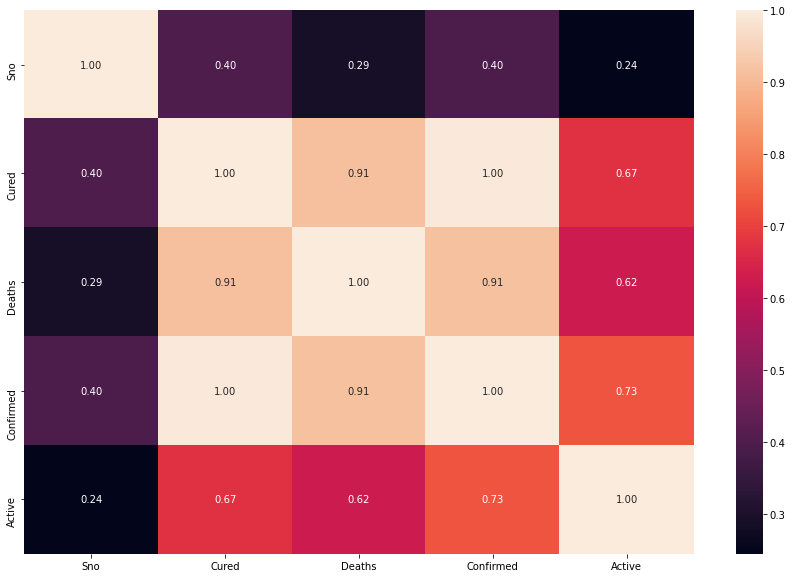

In [47]:
#Creating Corrlation matrix
fig=plt.subplots(figsize=(15,10))

sns.heatmap(df1.corr(),
           annot=True,
           fmt="0.2f");

In [48]:
#Country DF; dropping some coloumns
drop_list=["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"]
df_country = df1.drop(drop_list, axis=1)
df_country

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,1/30/2020,Kerala,0,0,1,1
1,1/31/2020,Kerala,0,0,1,1
2,2/1/2020,Kerala,0,0,2,2
3,2/2/2020,Kerala,0,0,3,3
4,2/3/2020,Kerala,0,0,3,3
...,...,...,...,...,...,...
16377,6/24/2021,Telangana,596628,3598,616688,16462
16378,6/24/2021,Tripura,58978,660,63499,3861
16379,6/24/2021,Uttarakhand,329182,7068,339127,2877
16380,6/24/2021,Uttar Pradesh,1678788,22336,1704790,3666


In [49]:
#convert to datetime
df_country['Date'] = pd.to_datetime(df_country['Date'])

#### Confirmed VS States

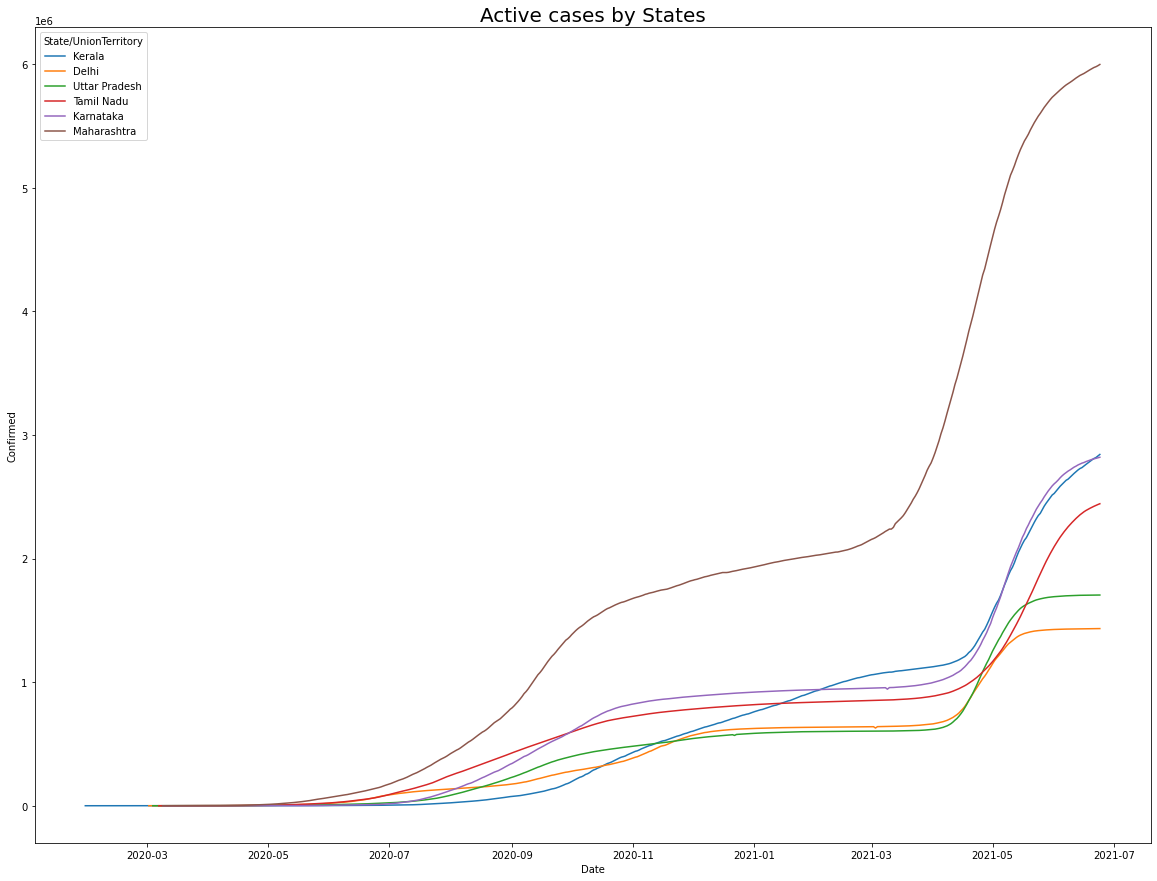

In [50]:
fig=plt.figure(figsize=(20,15))
ax=sns.lineplot(data=df_country[df_country['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],
                x='Date',
                y='Confirmed',
                hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()

* Conclusion : The number of Confirmed are going to be increased

#### Cured VS States

In [51]:
df_country

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
16377,2021-06-24,Telangana,596628,3598,616688,16462
16378,2021-06-24,Tripura,58978,660,63499,3861
16379,2021-06-24,Uttarakhand,329182,7068,339127,2877
16380,2021-06-24,Uttar Pradesh,1678788,22336,1704790,3666


In [52]:
#Creating India DataFrame

india_cases = df_country[df_country['Date'] == df_country['Date'].max()].copy()
india_cases.index = india_cases["State/UnionTerritory"]
india_cases = india_cases.drop(['State/UnionTerritory','Date'], axis=1)
india_cases.head()

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Andaman and Nicobar Islands,7210,127,7438,101
Andhra Pradesh,1798380,12452,1862036,51204
Arunachal Pradesh,31189,160,33916,2567
Assam,454726,4310,490907,31871
Bihar,708231,9569,720505,2705


In [53]:
#preparing top 10 cured states DataFrame
top_10_cured_states = india_cases.sort_values("Cured", ascending=False)
top_10_cured_states.head()

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Maharashtra,5753290,119303,5997587,124994
Kerala,2729967,12445,2842247,99835
Karnataka,2668705,34287,2819465,116473
Tamil Nadu,2358785,31746,2443415,52884
Andhra Pradesh,1798380,12452,1862036,51204


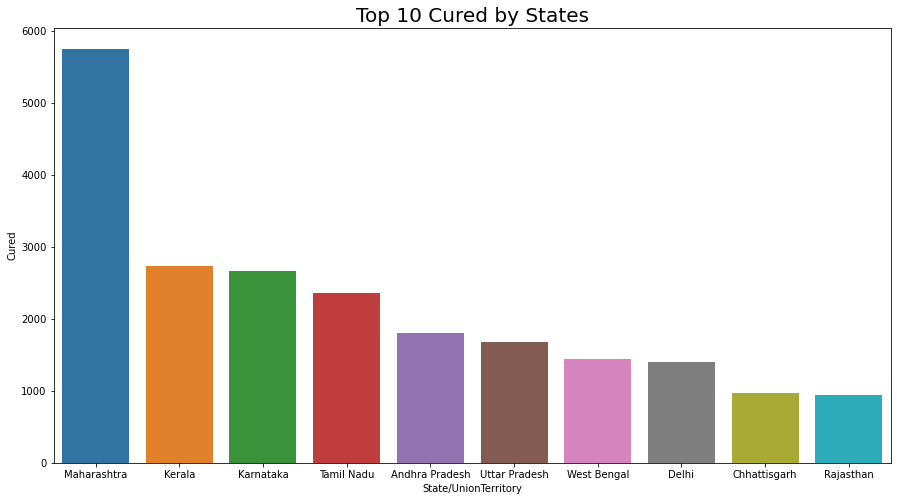

In [54]:
#visualize top 10 Cured by States

fig = plt.figure(figsize=(15,8))

ax = sns.barplot(data=top_10_cured_states[:10],
            x=top_10_cured_states.index[:10],
            y="Cured")
ax.set_title("Top 10 Cured by States", size=20)
ax.set_yticklabels(np.arange(0,7000,1000))

plt.show();

* Conclusion : Performance of curing in "Maharashtra" was the best one and after that "Kerala" and "Kamataka"

#### Actives VS States

In [55]:
#preparing top 10 Active by States

top_10_active_states = india_cases.sort_values("Active", ascending=False)
top_10_active_states.head()

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Maharashtra,5753290,119303,5997587,124994
Karnataka,2668705,34287,2819465,116473
Kerala,2729967,12445,2842247,99835
Tamil Nadu,2358785,31746,2443415,52884
Andhra Pradesh,1798380,12452,1862036,51204


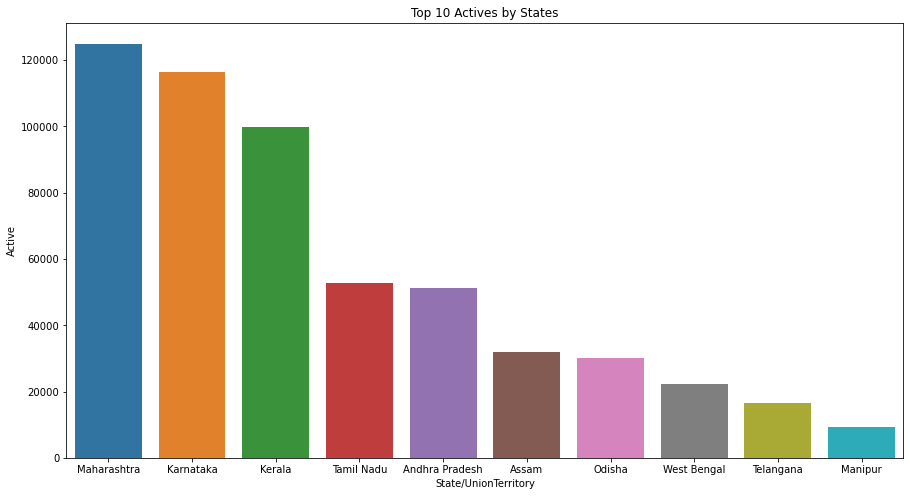

In [56]:
#Creating top 10 Active by States plot

fig = plt.figure(figsize=(15,8))
ax= sns.barplot(data=top_10_active_states[:10],
            x=top_10_active_states.index[:10],
            y="Active")

ax.set_title("Top 10 Actives by States")

plt.show();

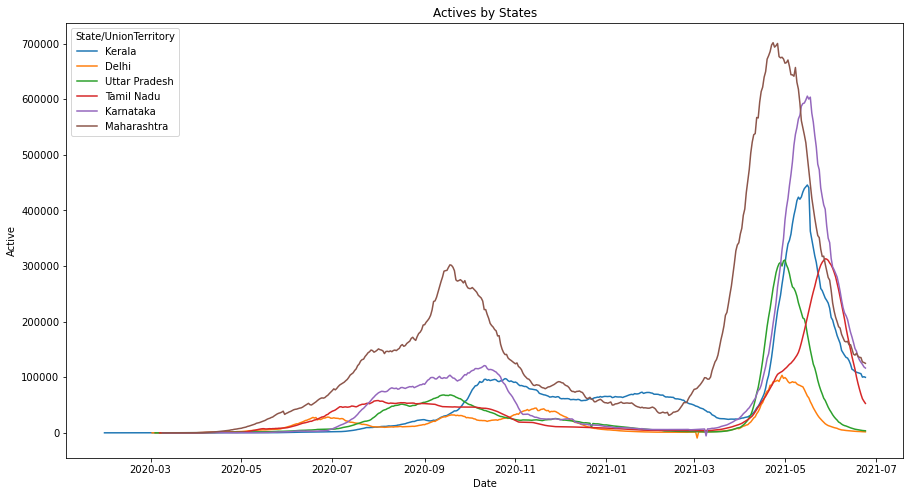

In [57]:
#Visualizing the active people by states during the time

fig = plt.figure(figsize=(15,8))
ax= sns.lineplot(data=df_country[df_country['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],
            x="Date",
            y="Active",
            hue="State/UnionTerritory")

ax.set_title("Actives by States")

plt.show();

* Conclusion : Performance of decreaseing actives people in "Maharashtra" was the worst one and after that "Kamataka" and "Kerala"

#### Deaths VS States

In [58]:
#Preparing top 10 deaths by states

top_10_deaths_states = india_cases.sort_values("Deaths", ascending=False)
top_10_deaths_states.head()

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Maharashtra,5753290,119303,5997587,124994
Karnataka,2668705,34287,2819465,116473
Tamil Nadu,2358785,31746,2443415,52884
Delhi,1406629,24940,1433366,1797
Uttar Pradesh,1678788,22336,1704790,3666


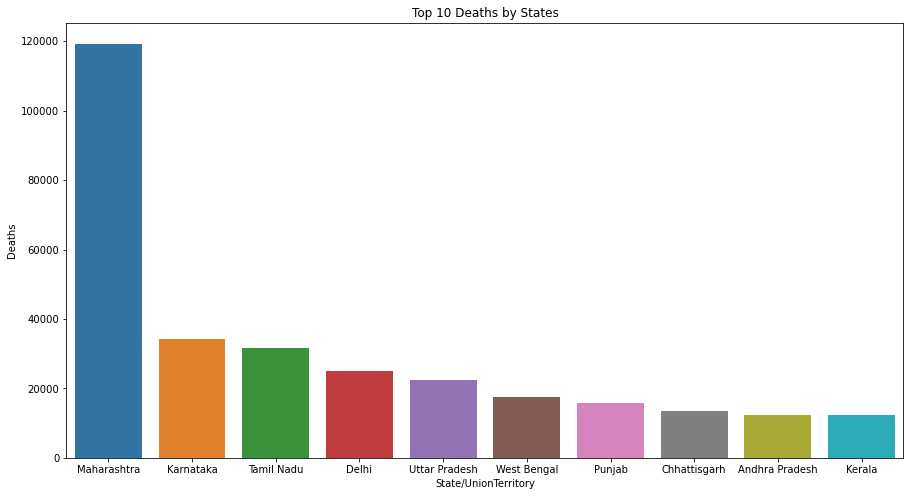

In [59]:
#Creating top 10 deaths by states plot

fig= plt.figure(figsize=(15,8))

ax = sns.barplot(data=top_10_deaths_states[:10],
                x=top_10_deaths_states.index[:10],
                y="Deaths")
ax.set_title("Top 10 Deaths by States")

plt.show();

* Conclusion : The worst states were "Maharashtra" and "Kamataka"

##### Now we got, the worst state was Maharashtra. Let's check its status

In [60]:
#preparing worst_state DataFrame

worst_state = df_country[df_country["State/UnionTerritory"]=="Maharashtra"].copy()
worst_state.index=worst_state["State/UnionTerritory"]
worst_state.drop("State/UnionTerritory",axis=1, inplace=True)
worst_state

,Date,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,,
Maharashtra,2020-03-09,0,0,2,2
Maharashtra,2020-03-10,0,0,5,5
Maharashtra,2020-03-11,0,0,2,2
Maharashtra,2020-03-12,0,0,11,11
Maharashtra,2020-03-13,0,0,14,14
...,...,...,...,...,...
Maharashtra,2021-06-20,5710356,117356,5963420,135708
Maharashtra,2021-06-21,5719457,117961,5972781,135363
Maharashtra,2021-06-22,5733215,118313,5979051,127523


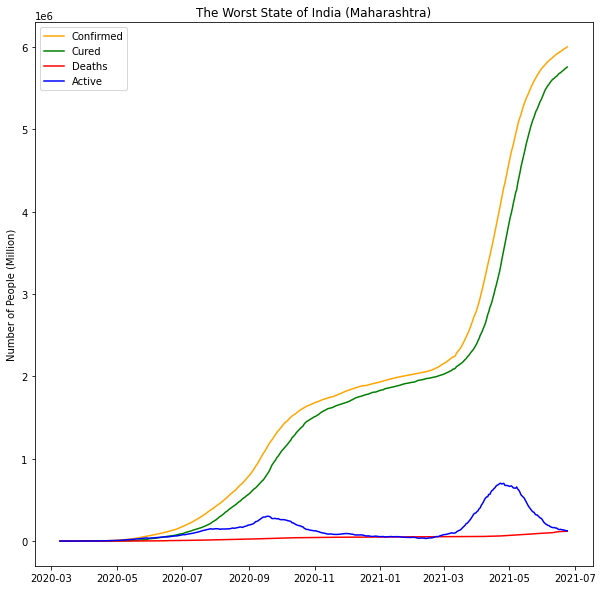

In [61]:
#Visualizing the worst state status

fig = plt.figure(figsize=(10,10))

plt.plot(worst_state.Date,
        worst_state.Confirmed,
        color="orange")

plt.plot(worst_state.Date,
        worst_state.Cured,
        color="green")

plt.plot(worst_state.Date,
        worst_state.Deaths,
        color="red")

plt.plot(worst_state.Date,
        worst_state.Active,
        color="blue")

plt.legend(["Confirmed","Cured","Deaths","Active"])


plt.ylabel("Number of People (Million)")
plt.title("The Worst State of India (Maharashtra)")
plt.show();

# df3 : covid_vaccine_statewise

In [62]:
#checking missing values

df3.isna().sum()

Updated On                                0
State                                     0
Total Individuals Vaccinated            149
Total Sessions Conducted                149
Total Sites                             149
First Dose Administered                 149
Second Dose Administered                149
Male(Individuals Vaccinated)            149
Female(Individuals Vaccinated)          149
Transgender(Individuals Vaccinated)     149
Total Covaxin Administered              149
Total CoviShield Administered           149
Total Sputnik V Administered           4775
AEFI                                   2332
18-45 years (Age)                      2335
45-60 years (Age)                      2334
60+ years (Age)                        2334
Total Doses Administered                144
dtype: int64

In [63]:
#managing missing values

vaccine_df = df3.drop(["Total Sputnik V Administered","AEFI","18-45 years (Age)","45-60 years (Age)","60+ years (Age)"],
                      axis=1)


vaccine_df.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0


## Visualiazing

* Compare Gender vaccination ✅
* Compare vaccination by the worst state ✅
* Compare first dose aministered and second dose administered ✅
* Compare vaccination by brands ✅
* Compare dose administered and individuals vaccinated ✅
* Top 10 states in vaccination (First Dose) ✅
* Top 10 states in vaccination (Second Dose) ✅
* Top 10 states in vaccination (Totally) ✅

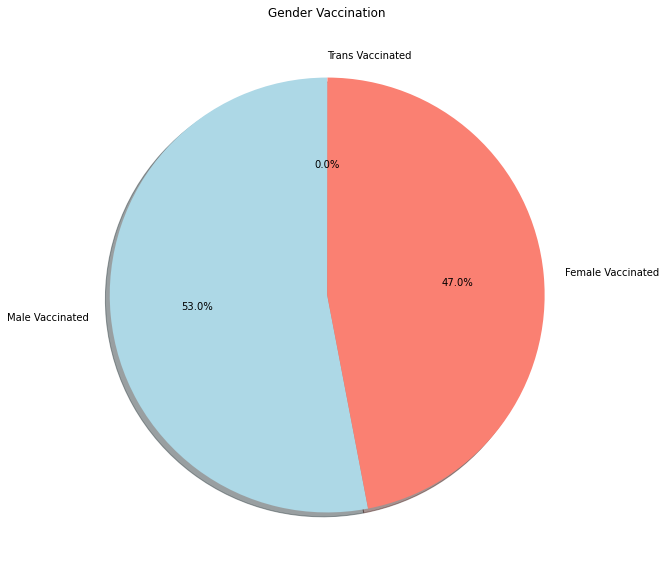

In [64]:
#Creating pie plot for gender vaccination

male = vaccine_df["Male(Individuals Vaccinated)"].sum()
female = vaccine_df["Female(Individuals Vaccinated)"].sum()
trans = vaccine_df["Transgender(Individuals Vaccinated)"].sum()
fig, ax = plt.subplots(figsize=(15,10))
ax.pie([male,female,trans],
       explode=None,
       colors=["lightblue","salmon","pink"],
       labels=["Male Vaccinated","Female Vaccinated","Trans Vaccinated"],
       autopct="%1.1f%%",
       shadow=True,
       startangle=90)

plt.title("Gender Vaccination")
plt.show()

* Conclusion : The most vaccinated people were male.

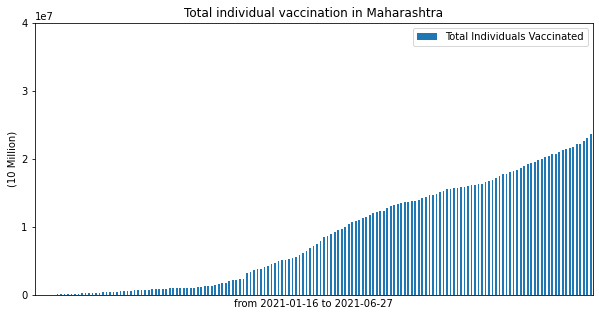

In [65]:
#Plotting total vaccination by time in the worst state (Maharashtra)

vaccine_df['Updated On'] = pd.to_datetime(vaccine_df['Updated On'])
Maharashtra_df=vaccine_df[vaccine_df["State"]=="Maharashtra"].copy()
drop_list=["State","Total Sessions Conducted","Updated On","Total Sites ", "First Dose Administered","Second Dose Administered","Male(Individuals Vaccinated)","Female(Individuals Vaccinated)","Transgender(Individuals Vaccinated)","Total Covaxin Administered","Total CoviShield Administered","Total Doses Administered"]
Maharashtra_df.index=Maharashtra_df["Updated On"]
Maharashtra_df.drop(drop_list,
                   axis=1,
                   inplace=True)
Maharashtra_df=Maharashtra_df.dropna()
Maharashtra_df.plot(kind="bar",
                   figsize=(10,5))
plt.title("Total individual vaccination in Maharashtra")
plt.xticks([])
plt.xlabel("from 2021-01-16 to 2021-06-27")
plt.yticks(np.arange(0,50000000,10000000))
plt.ylabel("(10 Million)");

* Conclusion : The amount of total individual vaccination is improving in the worst States of India

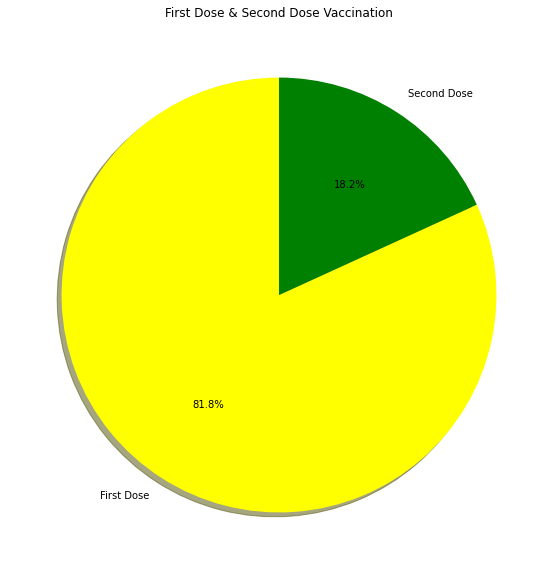

In [66]:
#Creating pie plot for first dose and second dose

first_dose = vaccine_df["First Dose Administered"].sum()
second_dose = vaccine_df["Second Dose Administered"].sum()

fig, ax = plt.subplots(figsize=(15,10))
ax.pie([first_dose,second_dose],
       explode=None,
       colors=["yellow","green"],
       labels=["First Dose","Second Dose"],
       autopct="%1.1f%%",
       shadow=True,
       startangle=90)

plt.title("First Dose & Second Dose Vaccination")

plt.show()

* Conclusion : The most vaccinated individuals have only gotten first dose

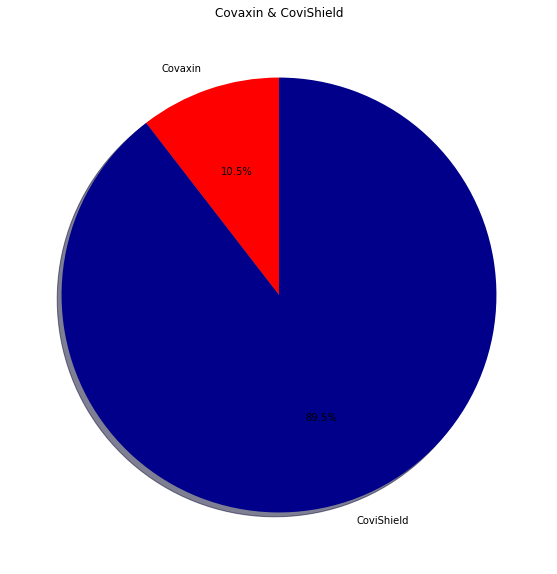

In [67]:
#Compare vaccination by brands

covaxin=vaccine_df["Total Covaxin Administered"].sum()
covisheild=vaccine_df["Total CoviShield Administered"].sum()

fig, ax=plt.subplots(figsize=(15,10))
ax.pie([covaxin, covisheild],
      explode=None,
      shadow=True,
      autopct="%1.1f%%",
      colors=["red","darkblue"],
      labels=["Covaxin","CoviShield"],
      startangle=90)

plt.title("Covaxin & CoviShield")

plt.show();

* Conclusion : Most of individual vaccinated used CoviShield brand 

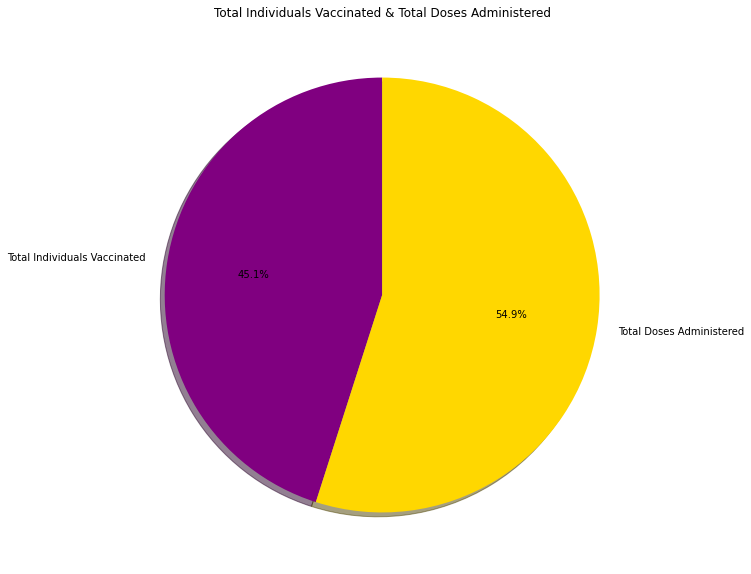

In [68]:
#creating plot to compare dose administered and individuals vaccinated

individuals=vaccine_df["Total Individuals Vaccinated"].sum()
doses=vaccine_df["Total Doses Administered"].sum()

fig, ax=plt.subplots(figsize=(15,10))
ax.pie([individuals, doses],
      explode=None,
      shadow=True,
      autopct="%1.1f%%",
      colors=["purple","gold"],
      labels=["Total Individuals Vaccinated","Total Doses Administered"],
      startangle=90)

plt.title("Total Individuals Vaccinated & Total Doses Administered")

plt.show();

* Conclusion : People who got first dose are much more than whom got both first and second dose

In [69]:
#Preparing States DataFrame

states_df=vaccine_df[vaccine_df["Updated On"]==vaccine_df["Updated On"].max()].copy()
states_df.index=states_df["State"]

drop_list=["State","Total Sessions Conducted","Updated On","Total Sites ","Male(Individuals Vaccinated)","Female(Individuals Vaccinated)","Transgender(Individuals Vaccinated)","Total Covaxin Administered","Total CoviShield Administered","Total Doses Administered"]
states_df.drop(drop_list,axis=1,inplace=True)
states_df.head()

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered
State,,,
India,202207183.0,202207183.0,46825911.0
Andaman and Nicobar Islands,115708.0,115708.0,15352.0
Andhra Pradesh,9257127.0,9257127.0,2620002.0
Arunachal Pradesh,331364.0,331364.0,79029.0
Assam,3841521.0,3841521.0,917328.0


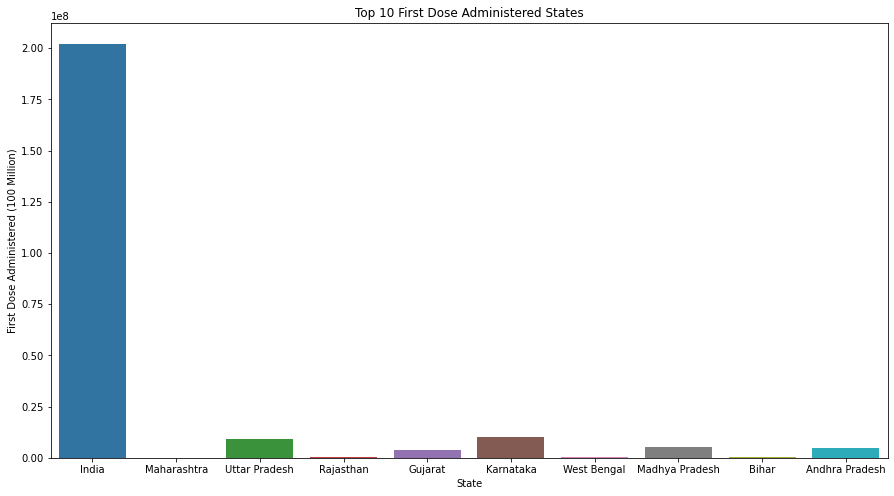

In [70]:
#Visualizing top 10 first dose administered states
top_10_first_dose=states_df.sort_values("First Dose Administered",ascending=False)

fig = plt.figure(figsize=(15,8))

ax = sns.barplot(data=top_10_first_dose[:10],
           x=top_10_first_dose.index[:10],
           y=states_df["First Dose Administered"][:10])
ax.set_title("Top 10 First Dose Administered States")
ax.set_ylabel("First Dose Administered (100 Million)")
plt.show();


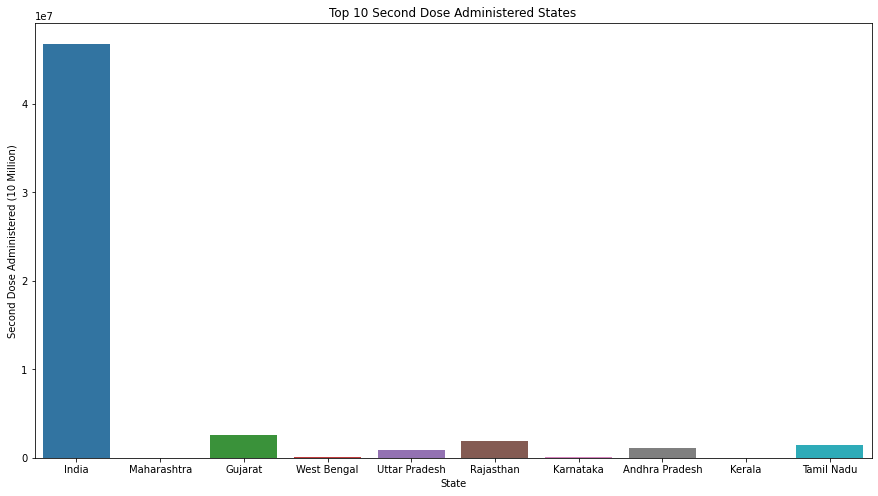

In [71]:
#Visualizing top 10 second dose administered states
top_10_second_dose=states_df.sort_values("Second Dose Administered",ascending=False)

fig = plt.figure(figsize=(15,8))

ax = sns.barplot(data=top_10_second_dose[:10],
           x=top_10_second_dose.index[:10],
           y=states_df["Second Dose Administered"][:10])
ax.set_title("Top 10 Second Dose Administered States")
ax.set_ylabel("Second Dose Administered (10 Million)")
plt.show();


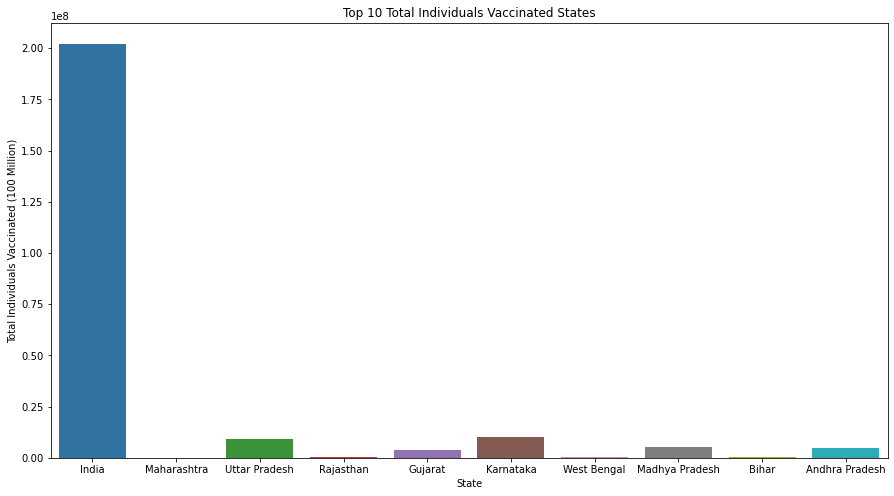

In [72]:
#Visualizing top 10 Total Individuals Vaccinated States
top_10_total=states_df.sort_values("Total Individuals Vaccinated",ascending=False)

fig = plt.figure(figsize=(15,8))

ax = sns.barplot(data=top_10_total[:10],
           x=top_10_total.index[:10],
           y=states_df["Total Individuals Vaccinated"][:10])
ax.set_title("Top 10 Total Individuals Vaccinated States")
ax.set_ylabel("Total Individuals Vaccinated (100 Million)")
plt.show();


* Conclusion : India and Maharashtra are the best States in vaccinaton

## Finding a pattern between datasets

* Make future with Prophet
* using machine learning algorithms with sklearn

#### Prophet

In [73]:
india_confirmed = df_country.groupby("Date")["Confirmed"].sum().reset_index()
india_confirmed

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
507,2021-06-20,29881965
508,2021-06-21,29935221
509,2021-06-22,29977861
510,2021-06-23,30028709
